In [1]:
import pandas as pd
import requests
import json
import numpy as np
import dataretrieval as nwis
import geopandas
import geojson

# Get Regression Regions 
(https://streamstats.usgs.gov/docs/nssservices/#/RegressionRegions/GET/RegressionRegion)

In [2]:

## Regions
WA = [713,714,715,716] #https://streamstats.usgs.gov/nssservices/regressionregions?regions=WA&statisticgroups=LFS / Western and nooksack
WA = [715] #https://streamstats.usgs.gov/nssservices/regressionregions?regions=WA&statisticgroups=LFS / Western and nooksack, only 715 has geometry
OR = [481,482,483,484,485,486,487,488,489,490] #https://streamstats.usgs.gov/nssservices/regressionregions?regions=OR&statisticgroups=LFS
ID = [126,127,128,129,130,131,132,133] # https://streamstats.usgs.gov/nssservices/regressionregions?regions=OR&statisticgroups=LFS / All come from same pub

PNW_regions = WA + OR + ID

StreamStatsServiceURLS = {
    'gage': 'https://streamstats.usgs.gov/nssservices/regressionregions/'
    }


gageURLParams = {
    'includeGeometry':'TRUE'
    }

for i in range(0,len(PNW_regions)):
    gageResponse = requests.get(url = StreamStatsServiceURLS['gage'] + str(PNW_regions[i]), params = gageURLParams)

    if gageResponse.status_code == 200:
        cookies = gageResponse.cookies
        try:
            gageStats = json.loads(gageResponse.content.decode('utf-8'))
            data = gageStats["location"]
            with open('../data/mapping/SS_LFS_Regions/'+ str(PNW_regions[i]) +'_region.json', 'w') as f:
                json.dump(data, f)
        except:
            pass

    else:
        pass

In [3]:
out = pd.DataFrame()
for i in PNW_regions:
    df = geopandas.read_file("../data/mapping/SS_LFS_Regions/"+str(i)+"_region.json",driver='GeoJSON')
    df["region"] = i
    out = pd.concat([out,df])
    
out = out.reset_index(drop=True)

In [4]:
## Deliniate by state
out.loc[out.region.isin(ID),"state"]="ID"
out.loc[out.region.isin(WA),"state"]="WA"
out.loc[out.region.isin(OR),"state"]="OR"

## Set regression regions
#OR
PNW_RR = {481:'OR1',
 483:'OR2',
 484:'OR3',
 485:'OR4',
 486:'OR5',
 487:'OR6',
 488:'OR7',
 489:'OR8',
 490:'OR9',
 482:'OR10',
 126:'ID1',
 127:'ID2',
 128:'ID3',
 129:'ID4',
 130:'ID5',
 131:'ID6',
 132:'ID7',
 133:'ID8',
 715:'WA1',
}

out['RegRegion'] = out['region'].map(PNW_RR)

In [180]:
## List regression equations
PNW_RE = {481:1.01760	*10-3.0008*(DA)1.0485*(P)1.7013*(SC)1.1884
 483:'OR2',1.08163	*1010.6911*(DA)0.9258*(ANT-20)-8.6715	1

 484:'OR3',1.25341	*10-7.0299*(DA)0.6094*(XE)1.7922*(NS)-0.2935

 485:'OR4',1.18146	*101.4300*(DA)0.4840*(SP)0.7386*(I)0.3590

 486:'OR5',1.26946	*10-6.7471*(DA)0.6488*(SP)2.0045*(XS)1.8062*(F)1.6791	1

 487:'OR6',1.22093908	*10-10.0921*(DA)0.9904*(P)2.6695*(DD)-2.0861*(E)1.3225	1

 488:'OR7',1.40029	*10-5.2957*(DA)1.2933*(P)3.1893*(NS)0.3979	1

 489:'OR8',1.53236	*10-4.9054*(DA)1.0929*(P)2.6289	1

 490:'OR9',1.23134	*104.4489*(DA)1.3380*(P)1.9319*(AXT-40)-7.1737	0.1

 482:'OR10',1.30702	*10-7.9709*(DA)0.9021*(P)3.0387*(SC)-2.3780*(G)0.4506	0.1

          
          
## Need 7q2 for the below (https://pubs.usgs.gov/sir/2006/5035/pdf/sir20065035.pdf)
 126:= 0.731 A0.613 (W + 1)0.907
 127:7Q2 = 0.000153 A1.04 P1.92
 128:7Q2 = 0.00953 A0.392 (R/1,000)3.36
 129:7Q2 = 0.0000215 A1.04 P2.41
 130:7Q2 = 0.000453 A1.04 (V+1)1.51
 131:7Q2 = 0.000133 A1.05 P2.10
 132:7Q2 = 0.0329 A0.678 (S50 + 1)0.796
 133:7Q2 = 3.86 A0.930 BS –0.648
 715:'0.000848*(DRNAREA)^(1.17)*(PRECIP)^(1.23)', ### This is 7q10, there is no 7q2 for WW
}

out['RegEQ'] = out['region'].map(PNW_RE)

In [5]:
states = geopandas.read_file("../data/mapping/cb_2018_us_state_5m/cb_2018_us_state_5m.shp")
states = states.to_crs(epsg=4269)
st = ["Idaho",'Washington','Oregon']
states = states[states["NAME"].isin(st)]

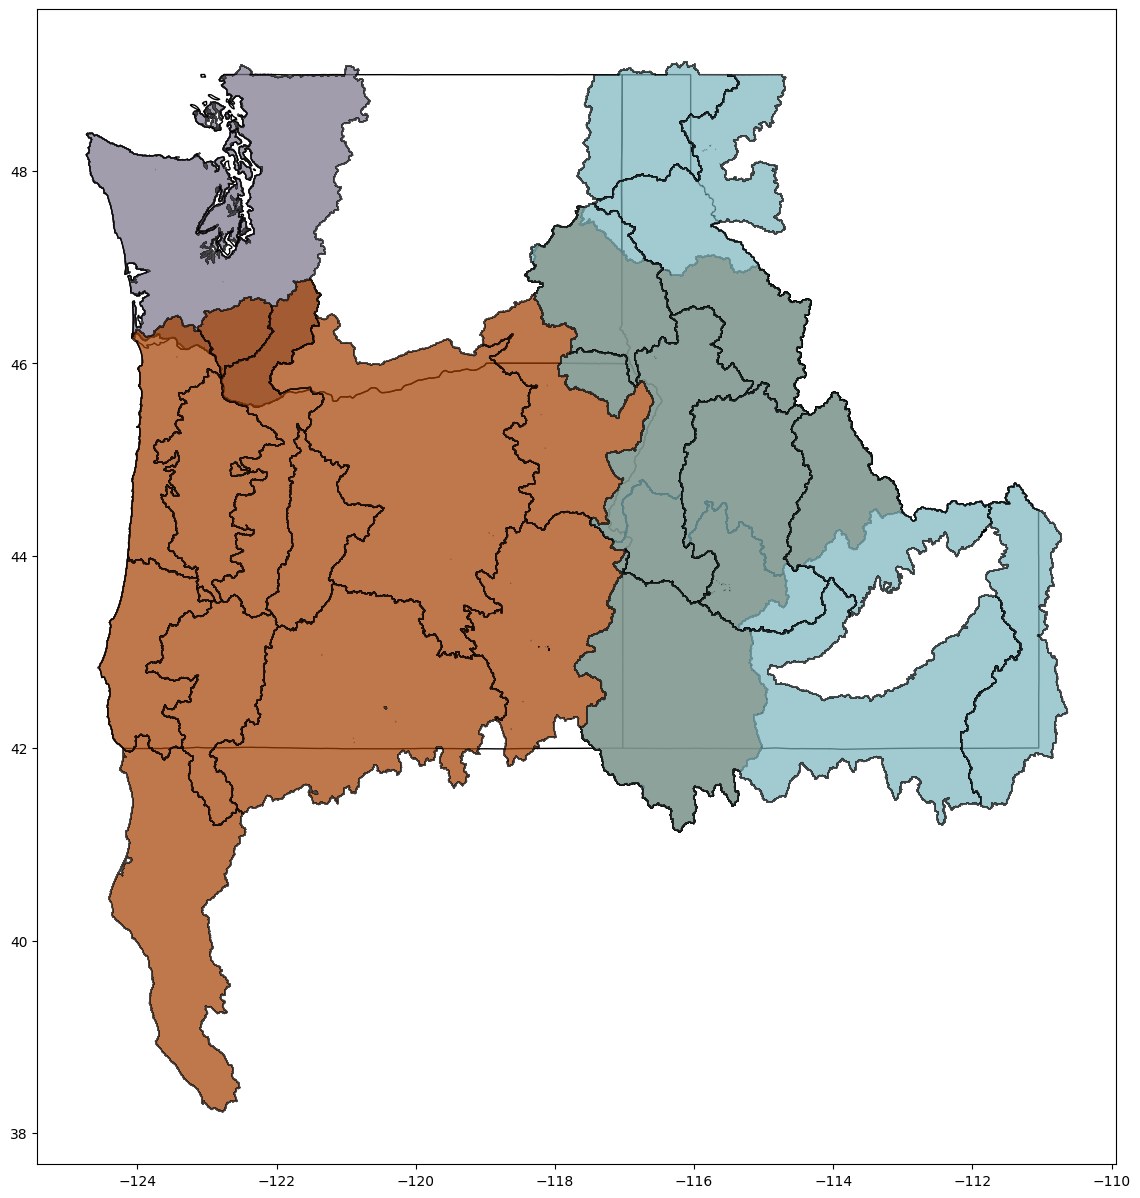

In [30]:
import matplotlib.pyplot as plt
f,ax = plt.subplots(figsize=(15, 15))

pal = {'OR': '#A33F00',
       'WA': '#7A748A',
       'ID': '#79B5BD'}


toPlot = out[out.RegRegion != "OR1"]
states.plot(ax=ax,facecolor="none",edgecolor = "black")
out.plot(ax=ax,color = out['state'].map(pal),alpha = 0.7,edgecolor = "black",legend=True)
plt.savefig("PNW_StreamStats_RegRegions.pdf")

In [191]:
DA = 63.75
P = 96.1
SC = 0.15
1.02287*(10)**(-2.7866)*(DA)**(1.0892)*(P)**(1.6841)*(SC)**(1.6694)

14.201410079569808